<a href="https://colab.research.google.com/github/henok-bot/Malaria_IMS_Analysis/blob/main/Another_copy_of_Requesting_and_Visualizing_Raster_CHIRPS_RF_Data_Using_ClimateSERVpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

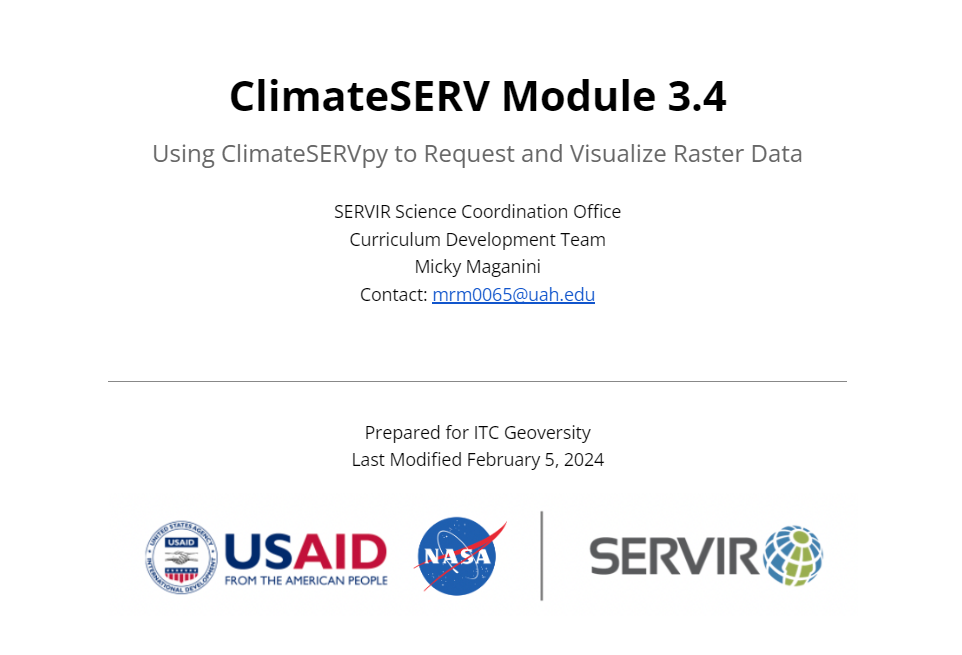

# Learning Objectives

By the end of this module, you will be able to

* **Request** data from ClimateSERV using the ClimateSERVpy Python API and store it on your Google Drive.
* **Manipulate** and **visualize** data from Climatserv using the Google Earth Engine Python package `geemap`.

# Prerequisites

To take this module you will need a Google Drive Account.
---


Welcome to Module 3.4! In the last module, we explored how to request and visualize tabular data (like .csv files) with ClimateSERVpy. This tabular data is great for getting a big-picture idea of trends in your area of interest. But what if you want the data representing the whole area of interest?

In this case, we may want to request raster data from ClimateSERV, which we can do in the form of either NetCDF or .tif files.

In Part 1, we will install some prerequisite packages and "Mount Google Drive" so we can work with Google Earth Engine and Google Drive to store, manipulate, and visualize data obtained from ClimateSERV.

In Part 2, we will visualize the raster data we got from ClimateSERV.

This notebook is written so that you can run each code cell exactly as it is written. There are a couple places where you can change the code, but this is optional.

#**IMPORTANT** : Before going further, click **File** --> **Save A Copy in Drive**. Then, please exit out of the original copy and give the file a new name in your Google Drive.


---



# **Part 1**

In Part 1 we will install the climateserv and rasterio packages which will allow us to download and visualize raster data respectively.

In [ ]:
!pip install climateserv rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 30.8 MB/s eta 0:00:00


Now that we have installed climateserv and geemap, we can import the packages into this notebook to request data from ClimateSERV. We will import a couple other packages as well.

In [ ]:
import climateserv.api
import os
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from google.colab import drive
from zipfile import ZipFile

**Note: If you get the error "Transport endpoint is not connected" for any of the cells in Chapter 1 Step 2, click on Runtime --> Disconnect and Delete Runtime**

Now that we have connected our Google Earth Engine Account to this Colab notebook, we will be able to visualize raster data here. Our next step is to "mount" Google Drive, which will allow us to save the data we request from ClimateSERV on our Drive.

Again, follow the instructions in the pop-up window to connect with your Google Drive account.

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


We can now use the `cd` command in Python, which stands for "choose directory", to navigate to a Google Drive folder of our choice..

For more information regarding selecting your working directory in Google Colab, visit [this site](https://saturncloud.io/blog/how-to-change-the-path-in-google-colab/#:~:text=One%20of%20the%20simplest%20ways,the%20current%20working%20directory%20instantly.).

In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


Now we will use the `mkdir` method to make a directory where we can store our ClimateSERV data. If you have already ran the cell below (or already have a folder with the name `climateserv_data` in your Google Drive, the below cell will give you an error). Ifthat is the case, you can simply continue to the next cell.

In [ ]:
os.mkdir("climateserv_RFdata")

FileExistsError: [Errno 17] File exists: 'climateserv_RFdata'

In [ ]:
cd climateserv_RFdata

/content/drive/MyDrive/climateserv_RFdata


We can use the `pwd` command, which stands for "print working directory", to see our current directory or folder, which is now our climateserv folder

In [ ]:
pwd

'/content/drive/MyDrive/climateserv_RFdata'

We can use the `ls` command to list the files that are in our current directory. This is helpful in ClimateSERV because it allows us to check and make sure data we requested from climateSERV is actually in our directory.

If we are in an empty folder in Google Drive, the code cell below will run, but will not print anything to the console. We can see that will change later on in this Module as we import data from ClimateSERV to this folder.

In [ ]:
ls

chirps_data_2020.zip  chirps_data_2021.zip  unzipped_files/


---
# **Chapter 2: Example Code**



Below you can find a generic code block that can be used to request data from ClimateSERV. You can run the code cell as is or

In order to request data from ClimateSERV, we need to define a set of parameters to give to the `climateserv.api.request_data` method. These parameters include a region of interest (`geometry`),a dataset of interest (`dataset`), a time period of interest (`start_date` and `end_date`), a spatial reducer (`reducer`), an output path (`outfile`) to write our data to. If we are requesting the NMME forecast data, we also need to specify the forecast ensemble we want to use (`ensemble`) as well as which variable we are requesting (`variable`). If we are not requesting the NMME forecast data, we can define these variables as empty strings.

You can find more information for how each parameter should be defined in the appendix located at the bottom of this document

In [ ]:
geometry = [[33, 3], [33, 15], [48, 15], [48, 3]]
dataset = 'CHIRPS'
operation = 'Download'
start_date = "01/01/2023"
end_date = "12/31/2023"
ensemble = ''
variable = ''
outfile = 'chirps_data_2023.zip'

We can now run the `climateserv.api.request_data` method with the parameters defined above.

You will then receive feedback from ClimateSERV that will tell you if you were successful in requesting your data. If you get an output saying "Could not write CSV data to the console..." ClimateSERV will provide an indication in the output regarding what went wrong. It could be that you mispelled the dataset name, or used the wrong format of your dates. You can see the format ClimateSERV requests data in the appendix at the bottom of this document.

In [ ]:
climateserv.api.request_data(dataset, operation, start_date, end_date, geometry, ensemble, variable, outfile)

New Script Run variable
About to process scripted job item now.
New Job Submitted to the Server: New JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Current Job Progress: 98.  JobID: 03d087e9-a2d4-4646-b302-5917ae7d4a7e
Cur

Now that we have downloaded the data from climateserv to our Google Drive, let's again use the `ls` method to list the files in our working directory

In [ ]:
os.mkdir('unzipped_files')

FileExistsError: [Errno 17] File exists: 'unzipped_files'

In [ ]:
ls

chirps_data_2020.zip  chirps_data_2021.zip  chirps_data_2023.zip  unzipped_files/


In [ ]:
pwd

'/content/drive/MyDrive/climateserv_RFdata/unzipped_files'

In [ ]:
with ZipFile("/content/drive/MyDrive/climateserv_RFdata/chirps_data_2023.zip", 'r') as zObject:
  zObject.extractall(
      path = "/content/drive/MyDrive/climateserv_RFdata/unzipped_files"
  )

In [ ]:

cd unzipped_files/

/content/drive/MyDrive/climateserv_RFdata/unzipped_files


In [ ]:
ls

20200101.tif  20200702.tif  20210101.tif  20210703.tif  20230102.tif  20230704.tif
20200102.tif  20200703.tif  20210102.tif  20210704.tif  20230103.tif  20230705.tif
20200103.tif  20200704.tif  20210103.tif  20210705.tif  20230104.tif  20230706.tif
20200104.tif  20200705.tif  20210104.tif  20210706.tif  20230105.tif  20230707.tif
20200105.tif  20200706.tif  20210105.tif  20210707.tif  20230106.tif  20230708.tif
20200106.tif  20200707.tif  20210106.tif  20210708.tif  20230107.tif  20230709.tif
20200107.tif  20200708.tif  20210107.tif  20210709.tif  20230108.tif  20230710.tif
20200108.tif  20200709.tif  20210108.tif  20210710.tif  20230109.tif  20230711.tif
20200109.tif  20200710.tif  20210109.tif  20210711.tif  20230110.tif  20230712.tif
20200110.tif  20200711.tif  20210110.tif  20210712.tif  20230111.tif  20230713.tif
20200111.tif  20200712.tif  20210111.tif  20210713.tif  20230112.tif  20230714.tif
20200112.tif  20200713.tif  20210112.tif  20210714.tif  20230113.tif  20230715.tif
2020

As we can see, we have a .tif file for each day of data. Let's use the rasterio package to visualize one of the .tif files.

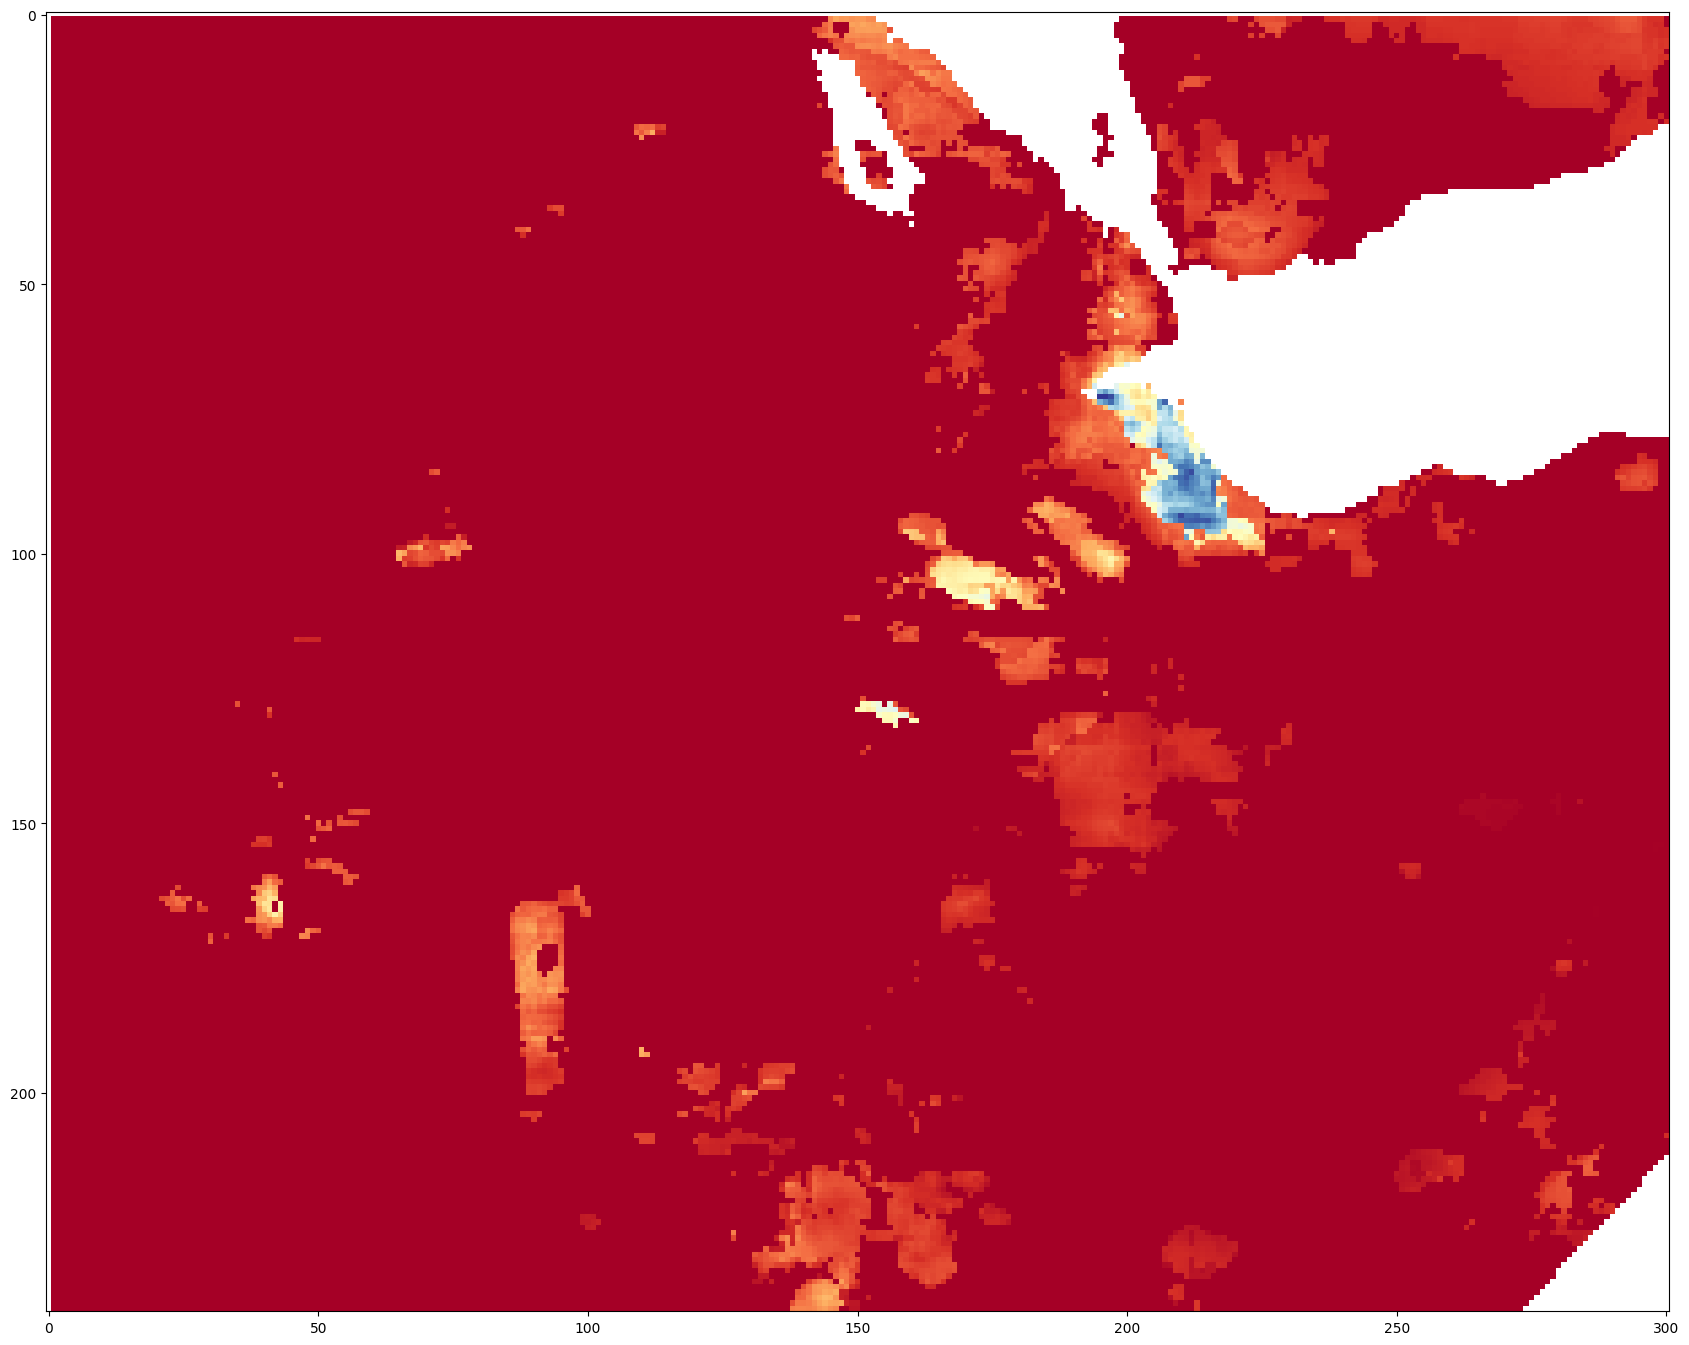

In [ ]:
rasterfile = rasterio.open('20230101.tif')
raster = rasterfile.read(1)
plt.figure(figsize = (17, 15))
plt.imshow(raster, cmap = "RdYlBu", vmin = 0, vmax = 30)
plt.tight_layout()
plt.show()

# **Appendix: Arguments for the api_request_data Method**

This appendix provides more information regarding each argument to the `climateserv.api_request_data` method. Each heading below is an argument that can be given to ClimateSERV. The text in parentheses next to the Argument specifies how we defined this parameter in this notebook. You can find more information regarding the ClimateSERVpy API on [this website](https://pypi.org/project/climateserv/).


**Dataset of Interest (`dataset`):**

This parameter must be fed as a string to the `request_data` method in ClimateSERV. Each dataset within climateserv has a specific string associated with it, which can be found in the [ClimateSERV Dataset Encyclopedia.](https://docs.google.com/document/d/17u7V5wlqEDVNv2v48m_crsk66D0Rd4nwpeg3BnlRkgU/edit?usp=sharing)

* `"IMERG_early"`: NASA-IMERG Early 1 day
* `"IMERG"`: NASA-IMERG Late 1 Day
* `"ESI_12"`: SPoRT Evaporative Stress Index 12-Weeek
* `"ESI_4"`:SPoRT Evaporative Stress Index 4-Week
* `"USDA_SMAP"`: USDA SMAP Soil Moisture Profile
* `"USDA_SSSM"`: USDA SMAP Subsurface Soil Moisture
* `"USDA_SSSMA"`: USDA SMAP Subsurface Soil Moisture Anomlay
* `"USDA_SSM"`: USDA Surface Soil Moisture
* `"USDA_SSMA"`: USDA Surface Soil Moisture Anomaly
* `"CHIRP"`: UCSB CHIRP Rainfall
* `"CHIRPS"`: UCSB CHIRPS Rainfall with Stations
* `"CentralAsia_eMODIS"`: USGS eMODIS NDVI Central Asia
* `"EastAfrica_eMODIS"`: USGS eMODIS NDVI East Africa
* `"SouthAfrica_eMODIS""`: USGS eMODIS NDVI Southern Africa
* `"WestAfrica_eMODIS"`: USGS eMODIS NDVI West Africa
* `"CHIRPS_GEFS_precip_mean"`: UCSB CHIRPS-GEFS 10-day forecast mean precipitation
* `"CHIRPS_GEFS_anom"`: UCSV CHIRPS-GEFS 10-day forecast mean anomaly
* `"CCSM4"`: NMME Community Climate System Model version 4
* `"CFSV2"`: NMME Climate Forecast Model Version 2
* Datasets that are Not Available in ClimateSERVpy API as of February 14, 2024:
  * NSIDC SMAP Dataset
  * LIS Datasets

**Operation Type (`operation_type`)**
ClimateSERVpy allows you to download data as tabular data or the raw raster data. The Tabular data provides timeseries information in the form of a .csv file. If you are requesting tabular data, as we are in this case, we need to pick a sptial reducer which will determine  how ClimateSERV will spatially reduce your data such that you have one value per date that represents your region of interest.

If downloading tabular data, set `operation_type` to be one of the following strings:
* `"Average"` will return the average value over all the pixels in your region of interest for each date.
* `"Min"` will return the minimum value over all the pixels in your region of interest for each date.
* `"Max"` will return the maximum value over all the pixels in your region of interest for each date.

If downloading raster data, set `operation_type` to be one of the following strings

* `"Download"`: Will Download your data as a .zip file of tifs
* `"NetCDF"`: will download your data as a NetCDF (.nc) file

**Start Date (`start_date`)**:

Your time period will be specified by two parameters, both of which will be strings (text enclosed with quotation marks). One parameter will outline the starting date of your period of interest in "MM/DD/YYYY" format.

**End Date (`end_date`)**:

Your time period will be specified by two parameters, both of which will be strings (text enclosed with quotation marks). One parameter will outline the starting date of your period of interest in "MM/DD/YYYY" format.

**Region of Interest (`geometry`):**

This parameter must be fed as a two-dimensional list of ordered coordinate pairs that outline a polygon (i.e. `[[lon_1, lat_1], [lon_2, lat_2], ..., [lon_x, lat_x] etc.])` where `lon_x and lat_x` are the longitudes and latitudes of each point, respectively.

**Seasonal Ensemble (`ensemble`):**
This parameter will be an empty string (`''`) unless your `dataset` was the NMME `'CFSV2'` or NMME `'CCSM4'` datasets. If your dataset was one of these datasets, your ensemble variable can be:

* For CSFV2, your variable can be `ens01` - `ens10`, e.g.:
  * `ens01`
  * `ens02`
  * `ens03`
  * ...
  * `ens24`
* For CCSM4, your variable can be `ens01` - `ens10`, e.g.:
  * `ens01`
  * `ens02`
  * `ens03`
  * ...
  * `ens10`

**Seasonal Variable (`variable`)**:

This parameter will be an empty string (`''`) unless your `dataset` was the NMME `'CFSV2'` or NMME `'CCSM4'` datasets. If your dataset was one of these datasets, your ensemble variable can be: `Temperature` or `Precipitation`.



**Output Path** (`outfile`)

This parameter will consist of a string that outlines the file name and file format you wish to request the data from ClimateSERV as. You can name the file whatever you want, but you must include one of the following file extensions at the end of your file name. The file extension will depend on the parameter you gave to the `operation_type` argument.

If your operation type was 'max', 'min', or 'average' (i.e. you were requesting tabular data), your output path must end with: `'.csv'`: Comma Separated Value File

If your operation type was 'Download', (i.e. you were requesting raster data) your output path must end with `'.zip'` , which will contain a a zip folder containing Tagged Image (.tif) files.